## DSCI5340.005 Predictive Analytics and Business Forecasting 
### Homework 4 - Group 1
Md Mohsin Reza (11805929) 
Safa Kazi (11872240)
Umama Khanom Antara (11803668)

In [630]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

np.random.seed(123)

### Load and Summarize Dataset

In [631]:
auto = pd.read_csv("Auto.csv")
auto.info()
auto.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(3), int64(5), object(1)
memory usage: 27.7+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 1. Creating a Binary Variable

In [632]:
mpg_median = auto['mpg'].median()
print(f"mpg_median = {mpg_median}")

# Create binary variable based on median: 1 for high mpg, 0 for low mpg
auto['high_mpg'] = (auto['mpg'] > mpg_median).astype(int)

# Drop non-numeric 'name' column for modeling
auto_model = auto.drop(columns=['name'])
display(auto_model.head())

# Display value counts of 'high_mpg' in a table format
value_counts_df = auto_model['high_mpg'].value_counts().reset_index()
value_counts_df.columns = ['high_mpg', 'count']
display(value_counts_df)

mpg_median = 22.75


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,high_mpg
0,18.0,8,307.0,130,3504,12.0,70,1,0
1,15.0,8,350.0,165,3693,11.5,70,1,0
2,18.0,8,318.0,150,3436,11.0,70,1,0
3,16.0,8,304.0,150,3433,12.0,70,1,0
4,17.0,8,302.0,140,3449,10.5,70,1,0


,high_mpg,count
0,0,196
1,1,196


A binary variable 'high_mpg' was created, assigning 1 to cars with MPG above the median and 0 to cars with MPG below the median

### 2. Train/test split and linear SVM with different C

Splitting Training Data (80%) and Test Data (20%)

In [633]:
# Define features X and target y
X = auto_model.drop(columns=['mpg', 'high_mpg'])
y = auto_model['high_mpg']

# Train-test split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
X, y,
test_size=0.2,
random_state=123,
stratify=y
)

X_train.shape[0], X_test.shape[0]

(313, 79)

Pipeline: StandardScaler + SVC (linear kernel)

In [634]:
C_values = [0.01, 0.1, 1, 10, 100]

linear_results = []

for C in C_values:
    clf = make_pipeline(
        StandardScaler(),
        SVC(kernel='linear', C=C, random_state=123)
    )
    
    # 5-fold cross-validation 
    cv_scores = cross_val_score(clf, X_train, y_train, scoring='accuracy')
    mean_acc = cv_scores.mean()
    mean_err = 1 - mean_acc
    
    linear_results.append({
        'C': C,
        'cv_accuracy': mean_acc,
        'cv_error': mean_err
    })

linear_results_df = pd.DataFrame(linear_results)
display(linear_results_df)

,C,cv_accuracy,cv_error
0,0.01,0.910548,0.089452
1,0.10,0.910548,0.089452
2,1.00,0.907322,0.092678
3,10.00,0.916897,0.083103
4,100.00,0.913722,0.086278


In [635]:
best_linear_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='linear', C=best_C_linear)
)
best_linear_clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, kernel='linear'))])

In [636]:
y_pred_test_linear = best_linear_clf.predict(X_test)
test_acc_linear = accuracy_score(y_test, y_pred_test_linear)
print("Test accuracy:", test_acc_linear)
print(classification_report(y_test, y_pred_test_linear))
print(confusion_matrix(y_test, y_pred_test_linear))

Test accuracy: 0.8987341772151899
              precision    recall  f1-score   support

           0       0.97      0.82      0.89        40
           1       0.84      0.97      0.90        39

    accuracy                           0.90        79
   macro avg       0.91      0.90      0.90        79
weighted avg       0.91      0.90      0.90        79

[[33  7]
 [ 1 38]]


The results from 5-fold cross-validation showed that C = 10 provided the best performance, with the highest cross-validation accuracy of 0.9169 and the lowest error of 0.0831. Smaller values of C (0.01 and 0.1) gave identical results with an accuracy of 0.9105 and error of 0.0895, indicating similar performance but slightly lower than C = 10. On the other hand, C = 100 resulted in a slightly lower accuracy (0.9137) and higher error (0.0863), suggesting that too much regularization can lead to overfitting. Overall, C = 10 was found to be the optimal value, achieving the best balance between accuracy and error. This value was used to train the final model, which was then evaluated on the test set. The model achieved a test accuracy of 89.87%, demonstrating strong performance in predicting correctly.

### 3. Cross-validation errors and empirical implications

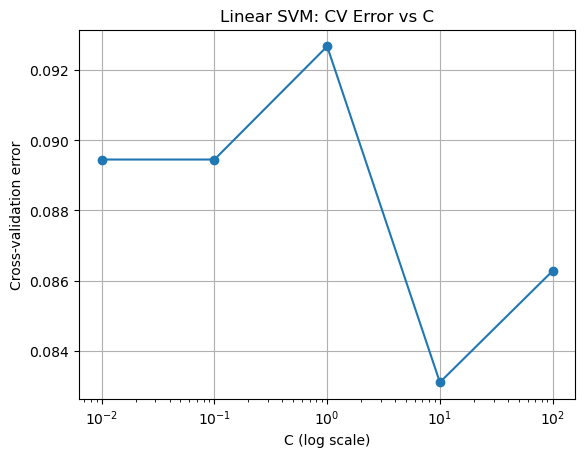

In [637]:
plt.figure()
plt.plot(linear_results_df['C'], linear_results_df['cv_error'], marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Cross-validation error')
plt.title('Linear SVM: CV Error vs C')
plt.grid(True)
plt.show()

As C increases, the error initially decreases, reaching its lowest point at C = 10, indicating the best performance with optimal regularization. At very low C values (like 0.01), the model underfits, resulting in higher cross-validation error. As C increases beyond 10 (e.g., 100), the error rises again, suggesting that the model starts overfitting, fitting the noise in the data. The optimal value for C is therefore 10, as it provides the best balance, ensuring good generalization while avoiding overfitting. This implies that moderate regularization is crucial for achieving the best model performance.

### 4. SVM with RBF and Polynomial kernels

In [638]:
#RBF Kernel
C_values_rbf = [0.01, 0.1, 1, 10, 100]
gamma_values = [0.01, 0.1, 1]
rbf_results = []

for C in C_values_rbf:
    for gamma in gamma_values:
        clf = make_pipeline(
            StandardScaler(),
            SVC(kernel='rbf', C=C, gamma=gamma)
        )
        cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        mean_acc = cv_scores.mean()
        mean_err = 1 - mean_acc
        
        rbf_results.append({
            'C': C,
            'gamma': gamma,
            'cv_accuracy': mean_acc,
            'cv_error': mean_err
        })

In [639]:
#Polynomial kernel
C_values_poly = [0.01, 0.1, 1, 10, 100]
degrees = [2, 3, 4]

poly_results = []

for C in C_values_poly:
    for degree in degrees:
        clf = make_pipeline(
            StandardScaler(),
            SVC(kernel='poly', C=C, degree=degree)
        )
        cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        mean_acc = cv_scores.mean()
        mean_err = 1 - mean_acc
        
        poly_results.append({
            'C': C,
            'degree': degree,
            'cv_accuracy': mean_acc,
            'cv_error': mean_err
        })

In [640]:
# Best RBF model
best_rbf_row = rbf_results_df.sort_values('cv_accuracy', ascending=False).iloc[0]
best_C_rbf = best_rbf_row['C']
best_C_rbf

np.float64(1.0)

In [641]:
best_gamma_rbf = best_rbf_row['gamma']
best_gamma_rbf

np.float64(1.0)

In [642]:
best_rbf_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='rbf', C=best_C_rbf, gamma=best_gamma_rbf)
)

best_rbf_clf.fit(X_train, y_train)
y_pred_test_rbf = best_rbf_clf.predict(X_test)

print(accuracy_score(y_test, y_pred_test_rbf))

0.9367088607594937


In [643]:
# Best Polynomial model
best_poly_row = poly_results_df.sort_values('cv_accuracy', ascending=False).iloc[0]
best_C_poly = best_poly_row['C']
best_C_poly

np.float64(10.0)

In [644]:
best_degree_poly = best_poly_row['degree']
best_degree_poly

np.float64(3.0)

In [645]:
best_poly_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel='poly', C=best_C_poly, degree=int(best_degree_poly))
)

best_poly_clf.fit(X_train, y_train)
y_pred_test_poly = best_poly_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_test_poly))

0.9113924050632911


For the RBF SVM, the model was very sensitive to both the C and gamma values. When gamma was small, the model couldn’t really capture the pattern in the data, and it kind of underfitted, so the accuracy was lower. But when gamma was too big, the model became too flexible and started fitting almost every small detail, which didn’t help on the test set and sometimes made things worse. Also C affects this too-bigger C usually tried harder to classify everything correctly, but sometimes it went too far and overfitted. Hence, the best performance happened when both C and gamma were in a good balanced range, not too small and not too large. This shows the RBF kernel can work really well, but it needs careful tuning or it messes up easily.

When the polynomial SVM was tested with different degrees and C values, the model changed a lot depending on the degree. With a low degree, like 2, the model was too simple and didn’t capture enough of the pattern, resulting in a mediocre accuracy. But when the degree got too high, like 4, the model became very complicated and it started overfitting the training data, so the validation accuracy dropped. It also depends on the C value, because a bigger C can make the model try too hard to get every point correct, which sometimes makes things worse. The best results usually happened with a medium degree, like 3, since it gave a good balance between flexibility and not making the model too complex. Overall, polynomial SVM works fine, but it’s more sensitive and needs some careful tuning to avoid messing up.

### 5. Plots to support Q2–Q4

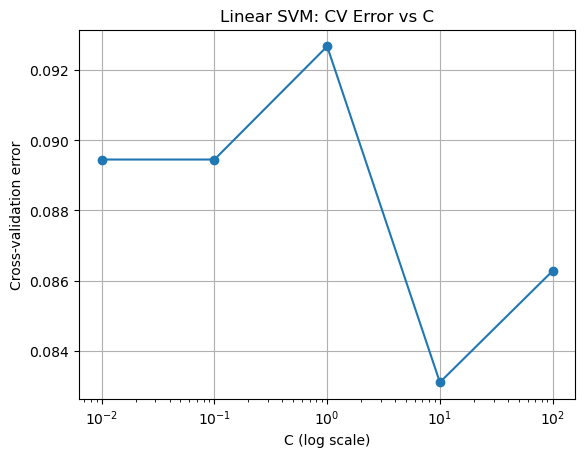

In [646]:
# Plot for Q2 - Linear SVM: CV Error vs C
plt.figure()
plt.plot(linear_results_df['C'], linear_results_df['cv_error'], marker='o')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Cross-validation error')
plt.title('Linear SVM: CV Error vs C')
plt.grid(True)
plt.show()

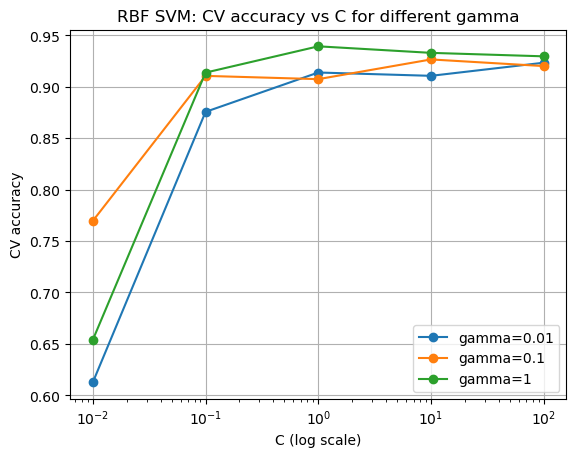

In [647]:
# 5(a) RBF
plt.figure()
for gamma in gamma_values:
    subset = rbf_results_df[rbf_results_df['gamma'] == gamma]
    plt.plot(subset['C'], subset['cv_accuracy'], marker='o', label=f'gamma={gamma}')
plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('CV accuracy')
plt.title('RBF SVM: CV accuracy vs C for different gamma')
plt.legend()
plt.grid(True)
plt.show()

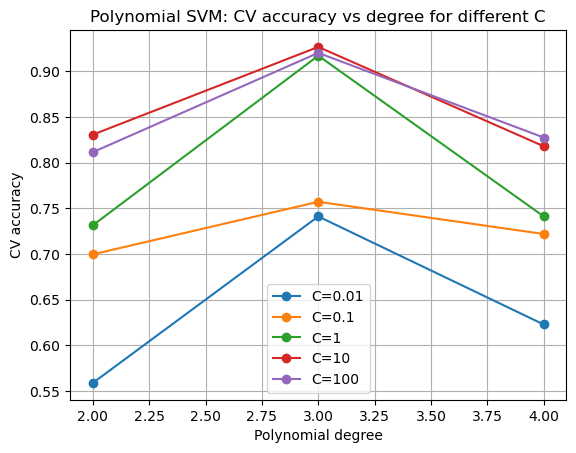

In [648]:
# 5(b) Polynomial
plt.figure()
for C in C_values_poly:
    subset = poly_results_df[poly_results_df['C'] == C]
    plt.plot(subset['degree'], subset['cv_accuracy'], marker='o', label=f'C={C}')
plt.xlabel('Polynomial degree')
plt.ylabel('CV accuracy')
plt.title('Polynomial SVM: CV accuracy vs degree for different C')
plt.legend()
plt.grid(True)
plt.show()